# Clase 14: Interpolación Polinomial

Las funciones genéricas son difíciles de integrar o derivar. Una manera de simplificar los cálculos es aproximar la función por medio de un polinomio cuyas derivadas e integrales son casi triviales.

Por otro lado, en muchos casos calcular una función es numéricamente costoso. Podemos entonces calcularla en un número de puntos limitado y asumiendo que es lo suficientemente suave, obtener valores aproximados para cualquier otro punto. A esto se lo llama interpolar la función.

Uno podría pensar que los polinomios de Taylor proveen una buena aproximación a las funciones.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

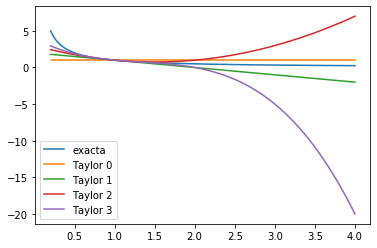

In [25]:
x = np.linspace(0.2, 4, 100)
ex = 1/x
tay0 = np.full(100, 1)
tay1 = 1 - (x - 1)
tay2 = 1 - (x - 1) + (x - 1)**2
tay3 = 1 - (x - 1) + (x - 1)**2 - (x - 1)**3

plt.plot(x, ex, label = 'exacta')
plt.plot(x, tay0, label = 'Taylor 0')
plt.plot(x, tay1, label = 'Taylor 1')
plt.plot(x, tay2, label = 'Taylor 2')
plt.plot(x, tay3, label = 'Taylor 3')

plt.legend()

## Polinomios de Lagrange

Dados $n+1$ puntos, hay un único polinomio de grado $n$ que pasa por todos esos puntos. Ese polinomio está dado por:

$$
P(x) = \sum_{i = 0}^n f(x_i) L_{n,i}(x)\,,
$$

donde

$$
L_{n,i}(x) = \prod_{j = 0, j \neq i}^n \frac{(x - x_j)}{(x_i - x_j)}
$$

In [1]:
def lagrange(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Legendre y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])
    
    return sum(fs*Lis)

In [33]:
puntos = ((2, 1/2), (2.75, 1/2.75), (4, 1/4))
lagrange(2, puntos)

0.5

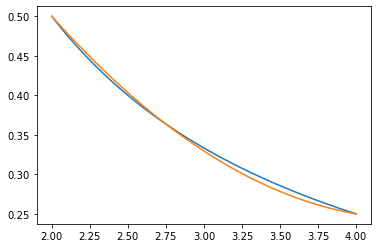

In [34]:
x = np.linspace(2, 4, 100)
plt.plot(x, 1/x)
plt.plot(x, [lagrange(xi, puntos) for xi in x])

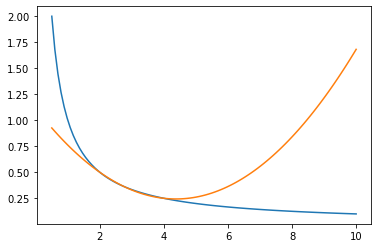

In [35]:
x = np.linspace(0.5, 10, 100)
plt.plot(x, 1/x)
plt.plot(x, [legendre(xi, puntos) for xi in x])

**Teorema:** (Teorema generalizado de Rolle) Si $f$ es una función continua y $n$ veces diferenciable sobre el intervalo $(a, b)$ y $f(x) = 0$ en $n + 1$ puntos diferentes en ese intervalo $x_o < x_1 < ... < x_n$, entonces existe un número $\xi \in (x_o, x_n)$ tal que $f^{(n)}(\xi) = 0$.

La intuición es la siguiente: Hay $n$ lugares donde la primera derivada es cero (entre los ceros), luego hay $n - 1$ lugares donde la segunda derivada es cero (entre los ceros de la primera) y así sucesivamente.

**Teorema:** Sean $x_0 < x_1 < ...< x_n \in [a,b]$ y $f$ una función $C^{n+1}[a,b]$, entonces para cada $x \in [a,b]$, existe un número $\xi \in (x_0,x_n)$ tal que 

$$
f(x) = P(x) + \frac{f^{(n+1)}(\xi)}{(n+1)!}(x - x_0)(x - x_1)...(x - x_n)\,.
$$

Demostración: Si $x = x_k$ se cumple trivialmente. Sea 

$$
g(t) = f(t) - P(t) - [f(x) - P(x)]\frac{(t - x_0)...(t - x_n)}{(x - x_0)...(x - x_n)}
$$

esta función es $n + 1$ veces diferenciable. Además $g(x_k) = 0$ y $g(x) = 0$. Entonces por el teorema generalizado de Rolle existe un número $\xi \in (x_0, x_n)$ tal que $g^{(n + 1)}(\xi) = 0$ y entonces

$$
f^{(n+1)}(\xi) - P^{(n + 1)}(\xi) - [f(x) - P(x)]\frac{d^{n + 1}}{dt^{n+1}}\frac{(t - x_0)...(t - x_n)}{(x - x_0)...(x - x_n)} = 0
$$

y además 

$$
\frac{d^{n+1}}{dt^{n+1}}\frac{(t - x_0)...(t - x_n)}{(x - x_0)...(x - x_n)} = \frac{(n + 1)!}{(x - x_0)...(x - x_n)}
$$

y entonces

$$
f^{(n + 1)}(\xi) - [f(x) - P(x)]\frac{(n + 1)!}{(x - x_0)...(x - x_n)} = 0
$$

despejando se obtiene el resultado.

**Ejemplo:** Queremos preparar una tabla de $e^x$ para puntos equidistantes entre $0$ y $1$. Pedimos que el error de una interpolación lineal entre dos puntos de la tabla sea menor a $10^{-6}$, encontremos el número de puntos necesarios.

$$
|f(x) - P(x)| \leq \frac{f^{(2)}(\xi)}{2!}|(x - jh)(x - (j + 1)h)| \leq \frac{e}{2}|(x - jh)(x - (j + 1)h)|
$$

Para encontrar el máximo de $|(x - jh)(x - (j + 1)h)|$ definimos $g(x) = (x - jh)(x - (j+1)h)$ tal que

$$
g'(x) = 2\left(x - jh - \frac{h}{2}\right)
$$

que tiene un extremo en $x = jh + h/2$ para el cual $g(x) = -h^2/4$, entonces

$$
|f(x) - P(x)| \leq \frac{e}{2}\frac{h^2}{4}. 
$$

Si queremos que esto sea menor que $10^{-6}$ necesitamos que $h \leq (8\times 10^{-6}/e)^{1/2}$, es decir más de $1/(8\times 10^{-6}/e)^{1/2}$ puntos.

In [75]:
h = np.sqrt(8*10**(-6)/np.exp(1))
num = int(1/h + 2)
true_h = 1/(num - 1)
x = np.linspace(0, 1, num)
e = np.exp(x)
puntos = [(x[i], e[i]) for i in range(num)]

In [78]:
def interp(x, puntos):
    i = int(x/true_h)
    Lo = puntos[i][1]*(x - puntos[i+1][0])/(puntos[i][0] - puntos[i+1][0])
    L1 = puntos[i+1][1]*(x - puntos[i][0])/(puntos[i+1][0] - puntos[i][0])
    return Lo + L1

In [83]:
np.full(10)

TypeError: full() missing 1 required positional argument: 'fill_value'

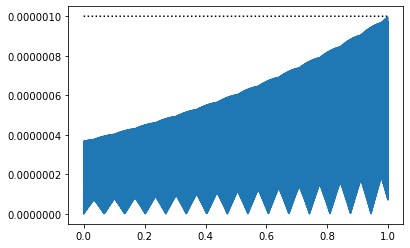

In [93]:
x = np.linspace(0, 0.999, 10*num)
plt.plot(x, np.abs(np.exp(x) - [interp(xi, puntos) for xi in x]))
plt.plot(x, np.full(10*num, 10**(-6)), linestyle=':', color='black')

## Diferencias divididas

Queremos obtener una lista de los coeficientes del polinomio de la forma

$$
P(x) = a_o + a_1 (x - x_o) + a_2 (x - x_o)(x - x_1) + ... + a_n (x - x_o)...(x - x_{n - 1})
$$

Claramente

$$
a_o = P(x_o) = f(x_o)
$$

continuando

$$
f(x_1) = P(x_1) = a_o + a_1 (x_1 - x_o)
$$

tal que

$$
a_1 = \frac{f(x_1) - f(x_o)}{x_1 - x_o} \equiv f[x_o, x_1]
$$

también

$$
f(x_2) = P(x_2) = a_o + a_1 (x_2 - x_o) + a_2 (x_2 - x_1)(x_2 - x_o)
$$

tal que

$$
a_2 = \frac{f(x_2) - f(x_o) - (f(x_1) - f(x_o))(x_2 - x_o)/(x_1 - x_o)}{(x_2 - x_1)(x_2 - x_o)}
$$

simplificando

$$
a_2 = \frac{(f(x_2) - f(x_o))/(x_2 - x_o) - (f(x_1) - f(x_o))/(x_1 - x_o)}{(x_2 - x_1)} = \frac{f[x_o, x_2] - f[x_o, x_1]}{(x_2 - x_1)} \equiv f[x_o, x_1, x_2]
$$

Se puede demostrar que

$$
a_k = f[x_o, x_1, ..., x_k] \equiv \frac{f[x_o, x_1,...,x_{k-2}, x_k] - f[x_o, x_1,...,x_{k-2},x_{k-1}]}{(x_k - x_{k-1})}
$$

In [162]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [175]:
puntos = np.array([[1, 0.7651977], [1.3, 0.6200860], [1.6, 0.4554022], [1.9, 0.2818186], [2.2, 0.1103623]])

In [176]:
coef = difer(puntos)

In [183]:
np.prod([i for i in range(0)])

1.0

In [184]:
def poly(x, coefs):
    return sum(coef[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

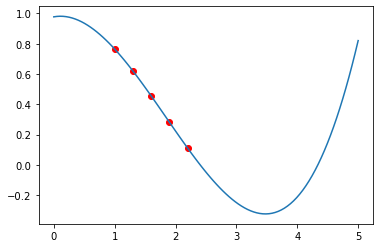

In [189]:
x = np.linspace(0, 5, 100)
plt.plot(x, [poly(xi, coef) for xi in x])
plt.scatter(puntos[:,0], puntos[:,1], color='red')

## Tareas

### Tarea 7.6

Use cinco puntos equidistantes para encontrar un polinomio interpolante de la función $f(x) = \sinh(x)$ entre $x = -5$ y $x = 5$. Grafique el polinomio. Estime el error cometido para cada $x$, usando la fórmula de error de los polinomios de Legendre. Luego grafique $|f(x) - P(x)|$ y compare con el error estimado.

In [305]:
p = np.linspace(-5, 5, 5)
puntos = np.array([[xi, np.sinh(xi)] for xi in p])

In [306]:
def legendre(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Legendre y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])
    
    return sum(fs*Lis)

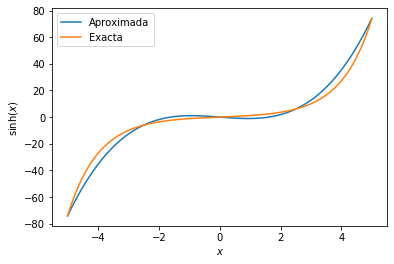

In [307]:
x = np.linspace(-5, 5, 100)
plt.plot(x, [legendre(xi, puntos) for xi in x], label='Aproximada')
plt.plot(x, np.sinh(x), label='Exacta')
plt.xlabel('$x$')
plt.ylabel('$\sinh(x)$')
plt.legend()

La fórmula del error es

$$
|f(x) - P(x)| \leq \left|\frac{f^{(6)}(\xi)}{6!}(x - x_o)...(x - x_5)\right|
$$

En nuestro caso $f^{(6)}(x) = \sinh(x)$ cuyo valor máximo se alcanza en el punto $x = 5$. Para encontrar el máximo del factor $(x - x_o)...(x - x_5)$ lo graficamos

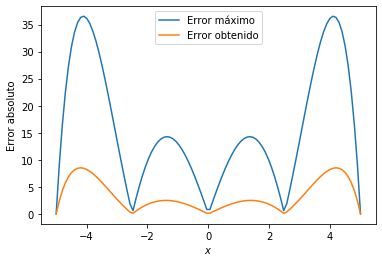

In [308]:
terms = [(x - xi) for xi in p]
r = 1
for t in terms:
    r *= t

plt.plot(x, np.abs(np.sinh(5)*r/np.math.factorial(6)), label='Error máximo')
plt.plot(x, np.abs(np.sinh(x) - [legendre(xi, puntos) for xi in x]), label='Error obtenido')
plt.xlabel('$x$')
plt.ylabel('Error absoluto')
plt.legend()

### Tarea 7.7

Use $10$ puntos equidistantes para encontrar un polinomio interpolante de la función $f(x) = \tanh(x)$ entre $x = -10$ y $x = 10$. Compare el polinomio con la función obtenida. Explique.

In [294]:
p = np.linspace(-10, 10, 10)
puntos = np.array([[xi, np.tanh(xi)] for xi in p])

In [295]:
def legendre(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Legendre y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])
    
    return sum(fs*Lis)

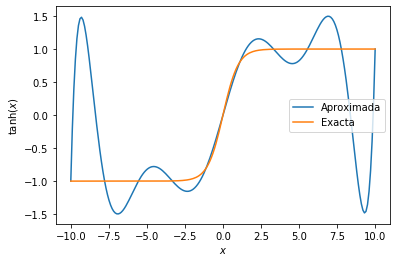

In [302]:
x = np.linspace(-10, 10, 200)
aprox = [legendre(xi, puntos) for xi in x]
plt.plot(x, aprox, label='Aproximada')
plt.plot(x, np.tanh(x), label='Exacta')
plt.xlabel('$x$')
plt.ylabel('$\\tanh(x)$')
plt.legend()

Text(0, 0.5, 'Error relativo')

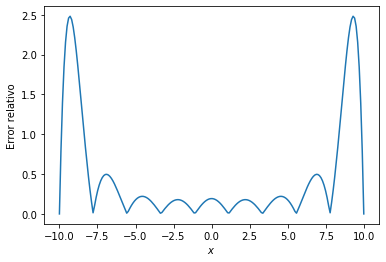

In [299]:
plt.plot(x, np.abs((aprox - np.tanh(x))/np.tanh(x)))
plt.xlabel('$x$')
plt.ylabel('Error relativo')

El polinomio es de muy alto grado y no aproxima bien la función ya que es altamente oscilante.

### Tarea 7.8

El polinomio interpolante se puede escribir

$$
P(x) = f[x_o] + f[x_o, x_1](x - x_o) + ... + f[x_o,...,x_n](x - x_o)(x - x_1)...(x - x_n)
$$

En clase escribimos un código para calcular esos coeficientes. Otro polinomio equivalente es

$$
P(x) = f[x_n] + f[x_n, x_{n-1}](x - x_n) + ... + f[x_n,...,x_o](x - x_n)(x - x_{n-1})...(x - x_1)
$$

Modifique el código para calcular los coeficientes de esta expresión.

In [310]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[n - i][1] # Basta invertir el orden de los puntos
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

### Tarea 7.9

Use un polinomio interpolante para aproximar la integral de una gaussiana con $\sigma = 1$ y $\mu = 0$, entre $x = 0$ y $x = 1$. Compare con el resultado obtenido a partir de

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

donde $\text{erf}(a)$ es la función de error y en python se puede llamar usando scipy.special.erf del modulo scipy.

In [340]:
def gauss(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

In [370]:
p = np.linspace(0, 1, 3)
puntos = np.array([[xi, gauss(xi)] for xi in p])

In [371]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [372]:
coefs = difer(puntos)

In [373]:
def poly(x, coefs):
    return sum(coefs[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

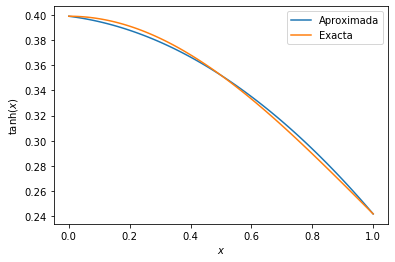

In [374]:
x = np.linspace(0, 1, 100)
aprox = [poly(xi, coefs) for xi in x]
plt.plot(x, aprox, label='Aproximada')
plt.plot(x, gauss(x), label='Exacta')
plt.xlabel('$x$')
plt.ylabel('$\\tanh(x)$')
plt.legend()

Siendo un polinomio de orden 3, podemos integrar directamente

$$
\int_{0}^1 \left(a_o + a_1 (x - x_o) + a_2 (x - x_o)(x - x_1)\right) = \left[\frac{1}{3}a_2 x^3 + \frac{1}{2}x^2(a_1 - a_2 x_1 - a_2 x_o) + x (a_o  - a_1 x_o + a_2 x_1 x_o)\right]_0^1
$$

In [376]:
def integ(x, a, p):
    return ((1/3)*x**3*a[2] + (1/2)*x**2*(a[1] - a[2]*p[1] - a[2]*p[0])\
           + x*(a[0] + (-a[1] + a[2]*p[1])*p[0]))

In [379]:
poly_int = integ(1, coefs, puntos[:,0]) - integ(0, coefs, puntos[:,0]) 

Comparamos con la función de error:

$$
\frac{1}{\sqrt{2 \pi}}\int_0^{a} dx\,e^{-x^2/2} = \frac{1}{2}\text{erf}\left(a/\sqrt{2}\right)
$$

In [362]:
from scipy import special

In [380]:
exact_int = special.erf(1/np.sqrt(2))/2

In [381]:
error_rel = (poly_int - exact_int)/exact_int

In [382]:
error_rel

0.0005399407193915037

### Tarea 7.10

Use una función interpolante para encontrar una buena aproximación a una gaussiana con $\sigma = 1$ y $\mu = 0$ entre $x = 0$ y $x = 2$. ¿Se puede usar ese mismo polinomio para aproximar la gaussiana en $x = 3$? De una respuesta cuantitativa y argumente.

In [394]:
def gauss(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

In [395]:
p = np.linspace(0, 2, 4)
puntos = np.array([[xi, gauss(xi)] for xi in p])

In [396]:
def difer(puntos):
    
    n = len(puntos) - 1
    Fs = [np.zeros(n + 1)]
    for i in range(n + 1):
        Fs[0][i] = puntos[i][1]
    for i in range(1, n + 1):
        Fs.append(np.zeros(n + 1 - i))
        for j in range(1, i + 1):
            Fs[j][i-j] = (Fs[j-1][i-j+1] - Fs[j-1][i-j])/(puntos[i][0] - puntos[i-j][0])
    
    return [Fs[i][0] for i in range(n + 1)]

In [397]:
coefs = difer(puntos)

In [398]:
def poly(x, coefs):
    return sum(coefs[n]*np.prod([(x - puntos[i,0]) for i in range(n)]) for n in range(len(coefs)))

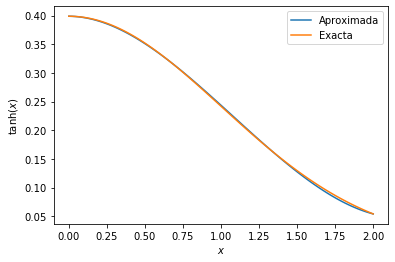

In [399]:
x = np.linspace(0, 2, 100)
aprox = [poly(xi, coefs) for xi in x]
plt.plot(x, aprox, label='Aproximada')
plt.plot(x, gauss(x), label='Exacta')
plt.xlabel('$x$')
plt.ylabel('$\\tanh(x)$')
plt.legend()

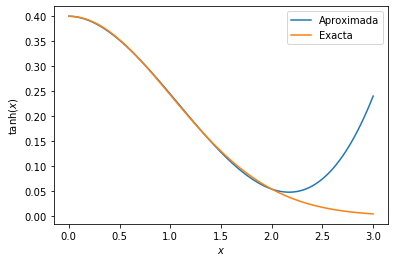

In [400]:
x = np.linspace(0, 3, 100)
aprox = [poly(xi, coefs) for xi in x]
plt.plot(x, aprox, label='Aproximada')
plt.plot(x, gauss(x), label='Exacta')
plt.xlabel('$x$')
plt.ylabel('$\\tanh(x)$')
plt.legend()

In [401]:
(poly(3, coefs) - gauss(3))/gauss(3)

53.063902141580414

Los polinomios interpolantes fracasan en puntos por fuera del intervalo para el cual fueron diseñados.